## Step 1: Explore the Data

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For interactive maps (later part)
import plotly.express as px
import folium

# To display all columns
pd.set_option("display.max_columns", None)

# Load the dataset
# Make sure the dataset CSV file is in the same folder as the notebook
df = pd.read_csv("zomato.csv", encoding='latin-1')

# Display the first 5 rows
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [2]:
# Dataset shape
print("Dataset contains:", df.shape[0], "rows and", df.shape[1], "columns")

# Column details
df.info()

# Descriptive statistics for numeric columns
df.describe(include='all').T


Dataset contains: 51717 rows and 17 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
url,51717,51717,https://www.zomato.com/bangalore/the-nest-the-...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,51717,11495,Delivery Only,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,51717,8792,Cafe Coffee Day,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
online_order,51717,2,Yes,30444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
book_table,51717,2,No,45268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rate,43942,64,NEW,2208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
votes,51717.0,NaN,NaN,NaN,283.697527,803.838853,0.0,7.0,41.0,198.0,16832.0
phone,50509,14926,080 43334321,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,51696,93,BTM,5124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rest_type,51490,93,Quick Bites,19132,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical Columns:\n", categorical_cols, "\n")
print("Numeric Columns:\n", numeric_cols)


Categorical Columns:
 ['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'] 

Numeric Columns:
 ['votes']


In [4]:
# View unique values for each categorical column (first 5 columns as sample)
for col in categorical_cols[:5]:
    print(f"Column: {col}")
    print(df[col].unique()[:10])  # showing only first 10 unique values
    print("Unique Count:", df[col].nunique())
    print("-"*50)


Column: url
['https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 'https://www.zomato.com/bangalore/spice-elephant-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwxODM3NTQ3NCwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 'https://www.zomato.com/SanchurroBangalore?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLDU5MDkwLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 'https://www.zomato.com/bangalore/addhuri-udupi-bhojana-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLCI1OTA5MCIsMTgzODI5NDQsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 'https://www.zomato.com/bang

In [5]:
# Check missing values
print("Missing values per column:\n", df.isnull().sum())

# Check duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates().reset_index(drop=True)
print("Shape after removing duplicates:", df.shape)


Missing values per column:
 url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Number of duplicate rows: 0
Shape after removing duplicates: (51717, 17)


## Step 2: Data Cleaning

In [6]:
# Rename columns for easier access
df = df.rename(columns={
    'approx_cost(for two people)': 'cost',
    'listed_in(type)': 'type',
    'listed_in(city)': 'city'
})

# Verify new column names
df.columns


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [7]:
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].replace('-', np.nan)
df['rate'] = df['rate'].str.replace('/5', '', regex=False)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')


In [8]:
# Remove commas from 'cost' and convert to numeric
df['cost'] = df['cost'].astype(str).str.replace(',', '', regex=False)
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')


In [9]:
# Fill categorical NaNs with mode
for col in ['location', 'rest_type', 'cuisines']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill numeric NaNs with median
df['cost'] = df['cost'].fillna(df['cost'].median())
df['rate'] = df['rate'].fillna(df['rate'].median())

df = df.drop(columns=['url', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item'], errors='ignore')

# Verify columns
df.columns


# Verify missing values again
df.isnull().sum()


name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
type            0
city            0
dtype: int64

In [10]:
# Convert 'online_order' and 'book_table' to binary (Yes=1, No=0)
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

df.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


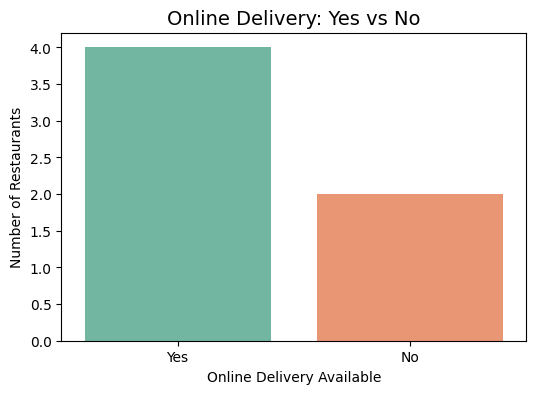

Online Delivery Availability (%):
 online_order
Yes    66.666667
No     33.333333
Name: proportion, dtype: float64


In [11]:
# Sample DataFrame to make the code runnable
data = {'online_order': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes']}
df = pd.DataFrame(data)

# Countplot (future-proof with hue)
plt.figure(figsize=(6,4))
sns.countplot(
    x='online_order',
    data=df,
    palette='Set2',
    hue='online_order',  # Assign x to hue for seaborn >=0.14
    legend=False
)

plt.title("Online Delivery: Yes vs No", fontsize=14)
plt.xlabel("Online Delivery Available")
plt.ylabel("Number of Restaurants")
plt.show()

# ✅ Percentage calculation
percentages = df['online_order'].value_counts(normalize=True) * 100
print("Online Delivery Availability (%):\n", percentages)


In [12]:
# Reload dataset
df = pd.read_csv("zomato.csv", encoding="latin-1")

# Rename important columns
df = df.rename(columns={
    'approx_cost(for two people)': 'cost',
    'listed_in(type)': 'type',
    'listed_in(city)': 'city'
})

# Clean 'rate' column
df['rate'] = df['rate'].replace(['NEW', '-', 'nan'], np.nan)
df['rate'] = df['rate'].astype(str).str.replace('/5', '', regex=False)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Clean 'cost' column
df['cost'] = df['cost'].astype(str).str.replace(',', '', regex=False)
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

# Handle missing values
for col in ['location', 'rest_type', 'cuisines']:
    df[col] = df[col].fillna(df[col].mode()[0])

df['cost'] = df['cost'].fillna(df['cost'].median())
df['rate'] = df['rate'].fillna(df['rate'].median())

# Convert Yes/No to binary
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

# Keep only the useful columns
df = df[['name','online_order','book_table','rate','votes',
         'location','rest_type','cuisines','cost','type','city']]

# Verify final columns
print(df.columns)
print(df.shape)


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'type', 'city'],
      dtype='object')
(51717, 11)


## Step 3: Data Visualization & Analysis

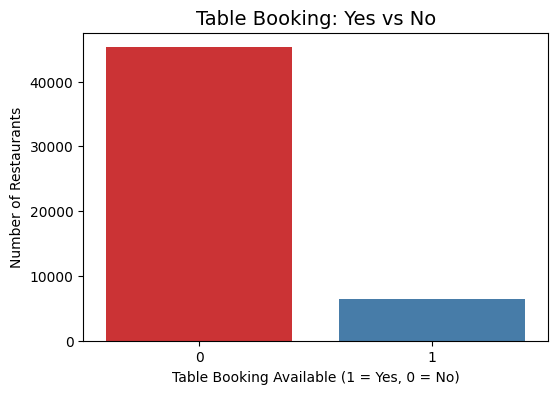

Table Booking Availability (%):
 book_table
0    87.530213
1    12.469787
Name: proportion, dtype: float64


In [13]:
# Countplot for Table Booking
plt.figure(figsize=(6,4))
sns.countplot(
    x='book_table',
    data=df,
    palette='Set1',
    hue='book_table',
    legend=False
)

plt.title("Table Booking: Yes vs No", fontsize=14)
plt.xlabel("Table Booking Available (1 = Yes, 0 = No)")
plt.ylabel("Number of Restaurants")
plt.show()

# Percentage calculation
table_booking_counts = df['book_table'].value_counts(normalize=True) * 100
print("Table Booking Availability (%):\n", table_booking_counts)


C:\Users\Yash Arora\AppData\Local\Temp\ipykernel_12696\1478998291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='book_table', y='rate', data=df, palette='deep')


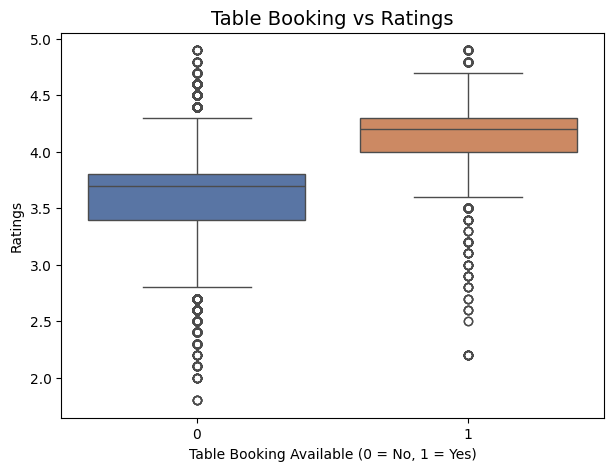

In [14]:
# Boxplot to see relation between table booking and ratings
plt.figure(figsize=(7,5))
sns.boxplot(x='book_table', y='rate', data=df, palette='deep')

plt.title("Table Booking vs Ratings", fontsize=14)
plt.xlabel("Table Booking Available (0 = No, 1 = Yes)")
plt.ylabel("Ratings")
plt.show()


In [15]:
# Average ratings for restaurants with and without table booking
avg_ratings = df.groupby('book_table')['rate'].mean()
print("Average Ratings based on Table Booking Availability:\n", avg_ratings)


Average Ratings based on Table Booking Availability:
 book_table
0    3.638656
1    4.133494
Name: rate, dtype: float64


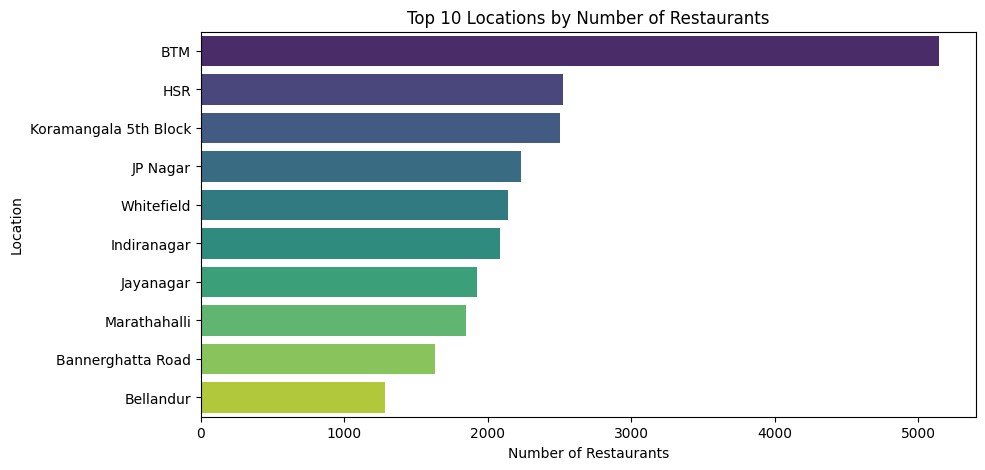

In [16]:
# Prepare data for the first plot
top_locations = df['location'].value_counts().head(10).reset_index()
top_locations.columns = ['location', 'count']

# Create the plot
plt.figure(figsize=(10, 5))
sns.barplot(data=top_locations, x='count', y='location', hue='location', palette='viridis', legend=False)
plt.title("Top 10 Locations by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Location")
plt.show()

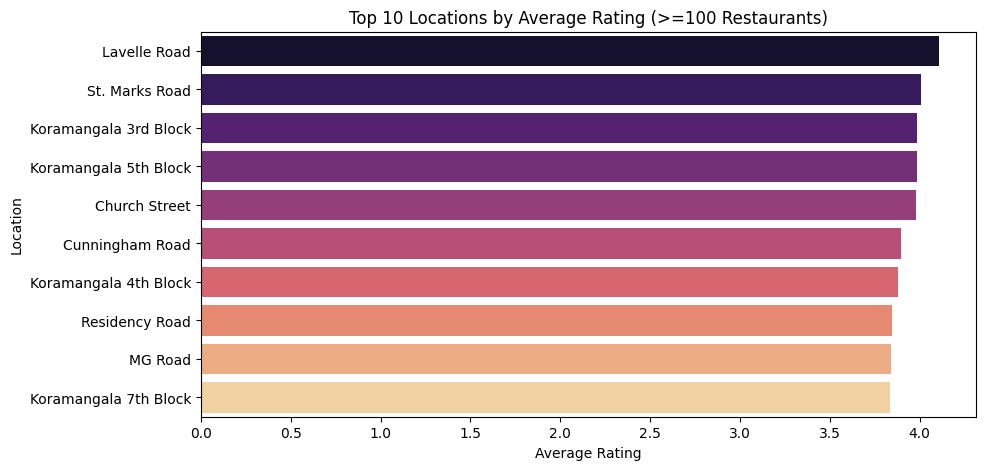

In [17]:
# Prepare data for the second plot using method chaining
top_rated = (
    df.groupby('location')['rate']
    .agg(['count', 'mean'])
    .query('count >= 100')
    .sort_values(by='mean', ascending=False)
    .head(10)
    .reset_index()
)

# Create the plot
plt.figure(figsize=(10, 5))
sns.barplot(data=top_rated, x='mean', y='location', hue='location', palette='magma', legend=False)
plt.title("Top 10 Locations by Average Rating (>=100 Restaurants)")
plt.xlabel("Average Rating")
plt.ylabel("Location")
plt.show()

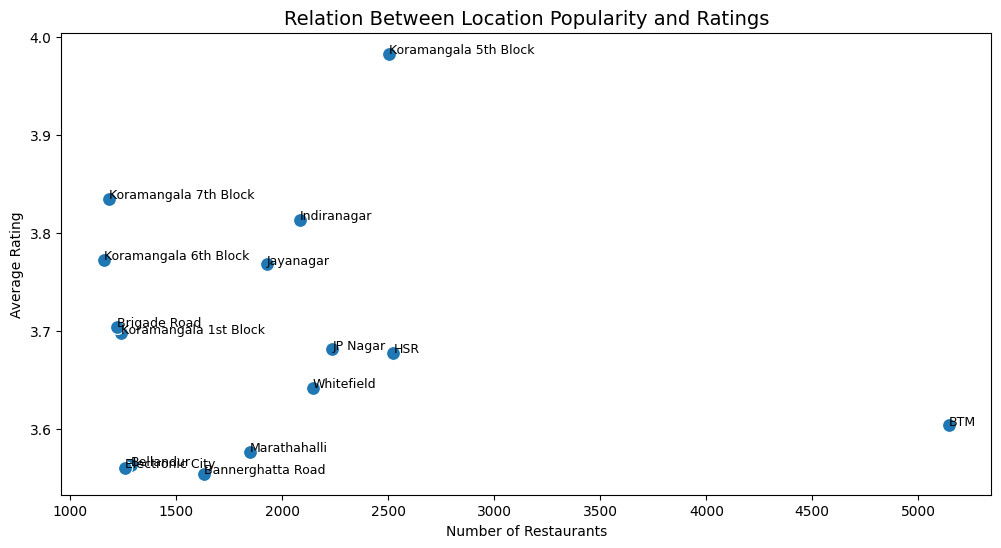

In [18]:
# Group by location: count + average rating
loc_summary = df.groupby('location').agg({
    'name': 'count',
    'rate': 'mean'
}).reset_index().rename(columns={'name': 'restaurant_count', 'rate': 'avg_rating'})

# Sort by restaurant count (top 15)
top_loc_summary = loc_summary.sort_values(by='restaurant_count', ascending=False).head(15)

# Plot
plt.figure(figsize=(12,6))
sns.scatterplot(
    x='restaurant_count',
    y='avg_rating',
    data=top_loc_summary,
    s=100
)

for i in range(top_loc_summary.shape[0]):
    plt.text(
        top_loc_summary['restaurant_count'].iloc[i],
        top_loc_summary['avg_rating'].iloc[i],
        top_loc_summary['location'].iloc[i],
        fontsize=9
    )

plt.title("Relation Between Location Popularity and Ratings", fontsize=14)
plt.xlabel("Number of Restaurants")
plt.ylabel("Average Rating")
plt.show()


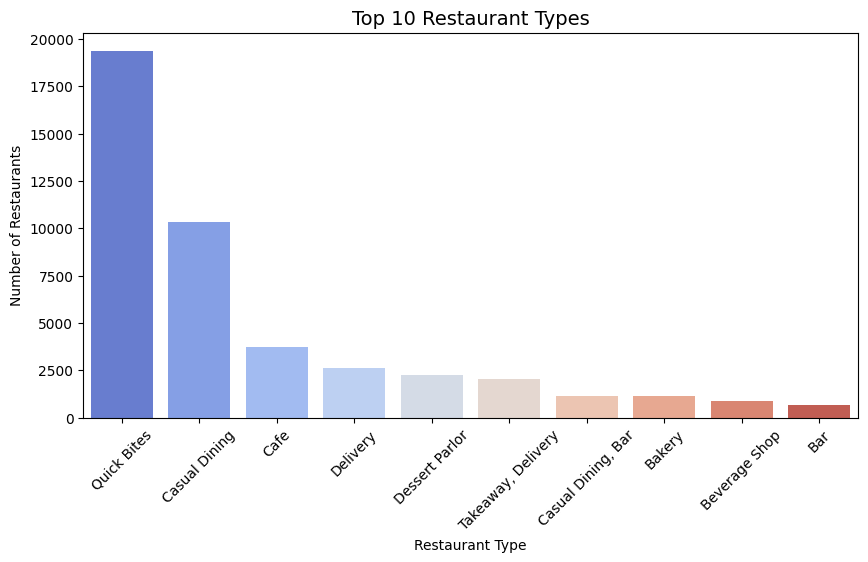

In [19]:
# Top 10 restaurant types
top_rest_types = df['rest_type'].value_counts().head(10).reset_index()
top_rest_types.columns = ['rest_type', 'count']

plt.figure(figsize=(10,5))
sns.barplot(
    data=top_rest_types,
    x='rest_type',
    y='count',
    hue='rest_type',   # required for seaborn >= 0.14
    palette='coolwarm',
    legend=False
)

plt.title("Top 10 Restaurant Types", fontsize=14)
plt.xlabel("Restaurant Type")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()


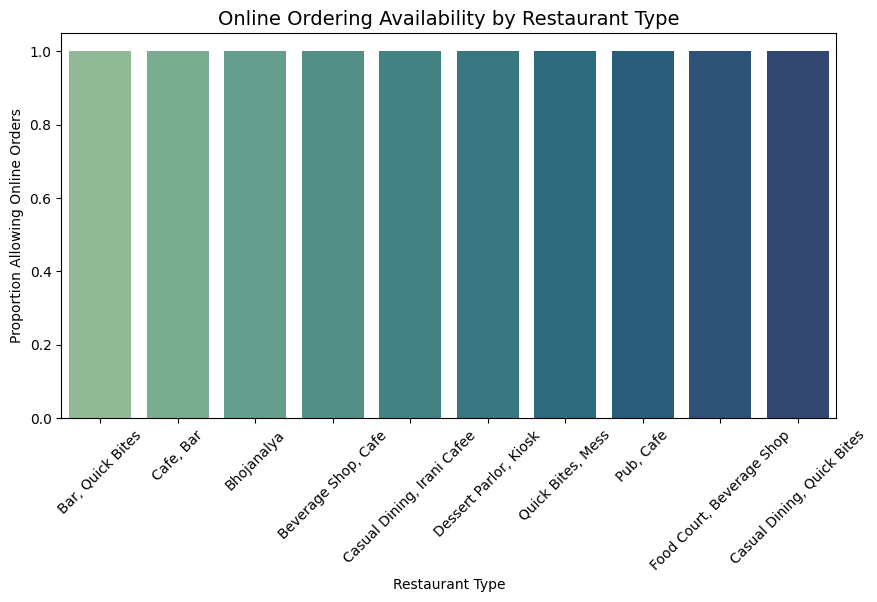

In [20]:
# Prepare DataFrame for plotting
rest_online = df.groupby('rest_type')['online_order'].mean().sort_values(ascending=False).head(10)
rest_online_df = rest_online.reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    data=rest_online_df,
    x='rest_type',
    y='online_order',
    hue='rest_type',
    palette='crest',
    legend=False
)

plt.title("Online Ordering Availability by Restaurant Type", fontsize=14)
plt.xlabel("Restaurant Type")
plt.ylabel("Proportion Allowing Online Orders")
plt.xticks(rotation=45)
plt.show()


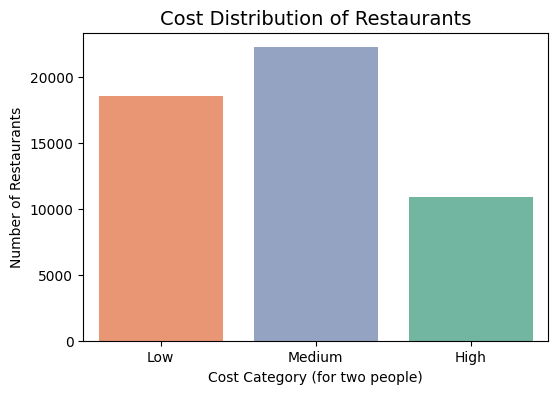

Cost Category Distribution (%):
 cost_category
Medium    43.070944
Low       35.876018
High      21.053039
Name: proportion, dtype: float64


In [21]:
# Create cost categories
def cost_category(x):
    if x <= 300:
        return 'Low'
    elif 300 < x <= 700:
        return 'Medium'
    else:
        return 'High'

df['cost_category'] = df['cost'].apply(cost_category)

# Countplot for cost categories (fixed for seaborn v0.14+)
plt.figure(figsize=(6,4))
sns.countplot(
    x='cost_category',
    data=df,
    order=['Low','Medium','High'],
    hue='cost_category',
    palette='Set2',
    legend=False
)

plt.title("Cost Distribution of Restaurants", fontsize=14)
plt.xlabel("Cost Category (for two people)")
plt.ylabel("Number of Restaurants")
plt.show()

# Percentage calculation
cost_counts = df['cost_category'].value_counts(normalize=True) * 100
print("Cost Category Distribution (%):\n", cost_counts)


## Step 4: Exploratory Data Analysis (EDA)

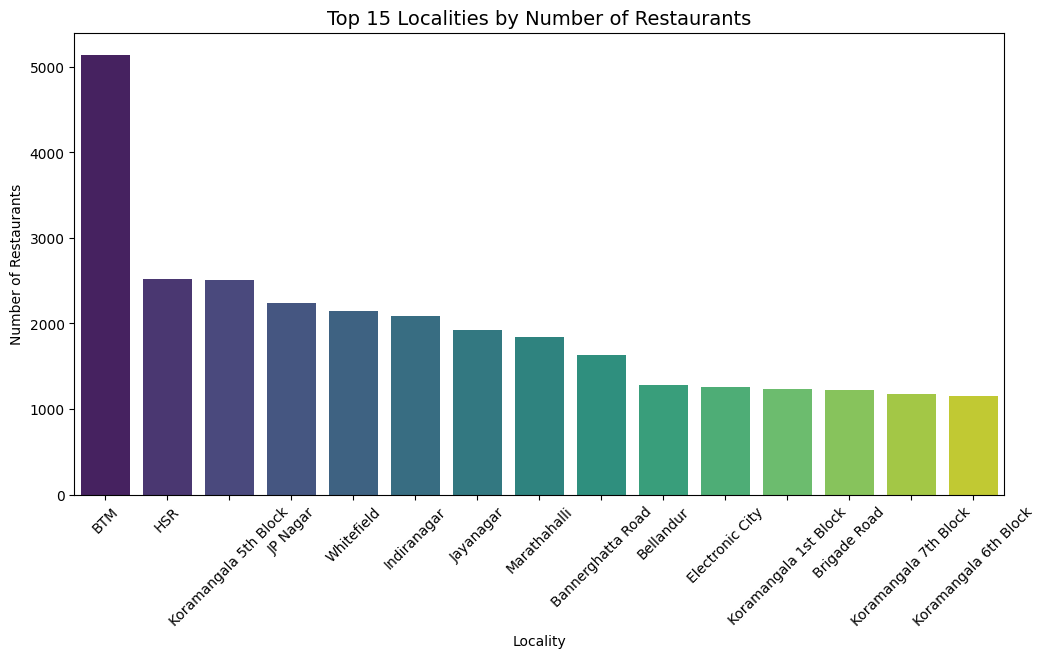

In [22]:
# Top 15 localities by number of restaurants
top_localities = df['location'].value_counts().head(15).reset_index()
top_localities.columns = ['location', 'count']

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_localities,
    x='location',
    y='count',
    hue='location',
    palette='viridis',
    legend=False
)

plt.title("Top 15 Localities by Number of Restaurants", fontsize=14)
plt.xlabel("Locality")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()


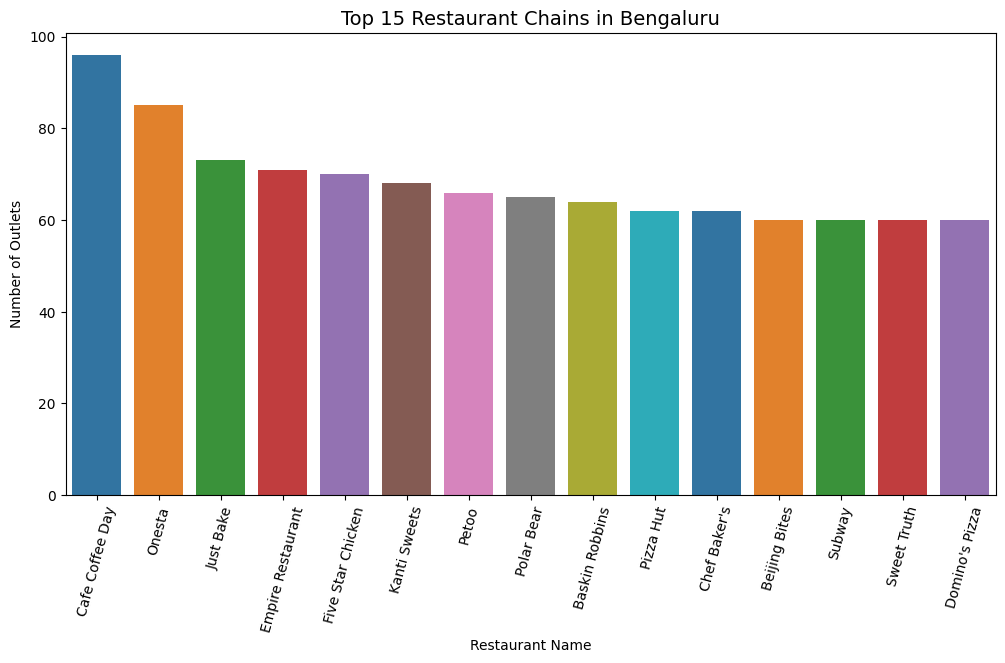

In [23]:
# Top 15 restaurant chains
top_chains = df['name'].value_counts().head(15).reset_index()
top_chains.columns = ['restaurant_name', 'count']

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_chains,
    x='restaurant_name',
    y='count',
    hue='restaurant_name',
    palette='tab10',
    legend=False
)

plt.title("Top 15 Restaurant Chains in Bengaluru", fontsize=14)
plt.xlabel("Restaurant Name")
plt.ylabel("Number of Outlets")
plt.xticks(rotation=75)
plt.show()


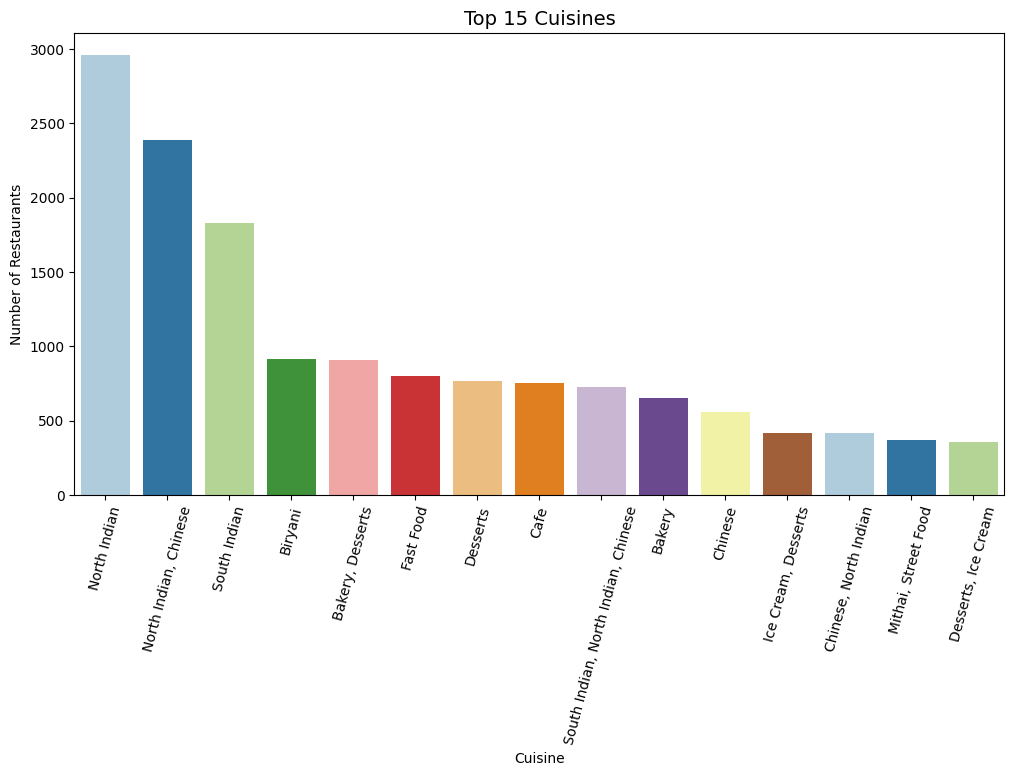

In [24]:
# Top 15 most common cuisines
top_cuisines = df['cuisines'].value_counts().head(15).reset_index()
top_cuisines.columns = ['cuisine', 'count']

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_cuisines,
    x='cuisine',
    y='count',
    hue='cuisine',
    palette='Paired',
    legend=False
)

plt.title("Top 15 Cuisines", fontsize=14)
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=75)
plt.show()


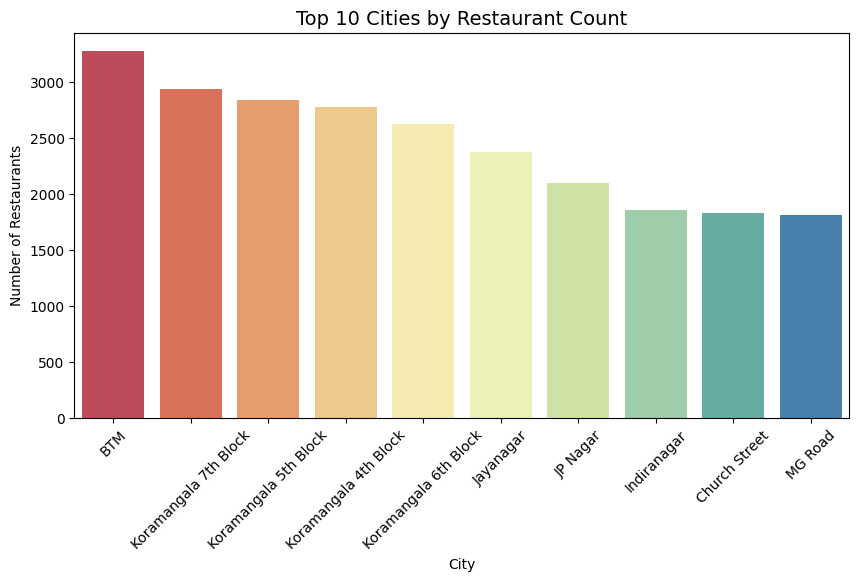

In [25]:
# Restaurant distribution across cities
city_counts = df['city'].value_counts().head(10).reset_index()
city_counts.columns = ['city', 'count']

plt.figure(figsize=(10,5))
sns.barplot(
    data=city_counts,
    x='city',
    y='count',
    hue='city',
    palette='Spectral',
    legend=False
)

plt.title("Top 10 Cities by Restaurant Count", fontsize=14)
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()


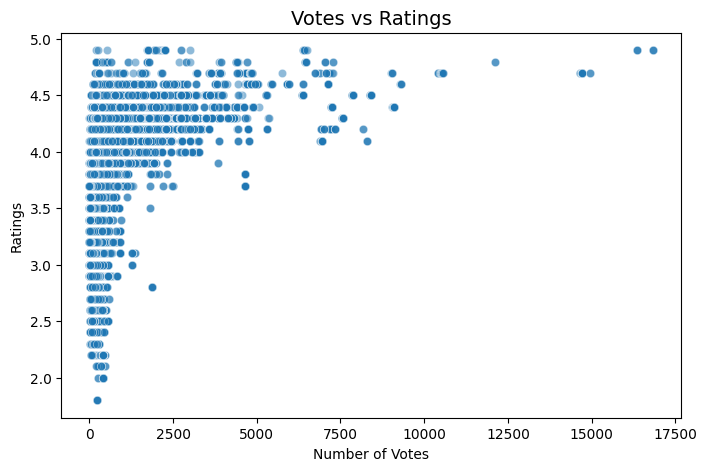

In [26]:
# Scatter plot: Votes vs Ratings
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='votes', y='rate', alpha=0.5)

plt.title("Votes vs Ratings", fontsize=14)
plt.xlabel("Number of Votes")
plt.ylabel("Ratings")
plt.show()


In [27]:
# Find value-for-money restaurants (high rating, low cost)
vfm = df[(df['rate'] >= 4.0) & (df['cost'] <= 500)]
print("Sample of Value-for-Money Restaurants:\n")
print(vfm[['name','location','cost','rate']].head(10))


Sample of Value-for-Money Restaurants:

                                                 name            location  \
10  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ...        Banashankari   
12                                   The Coffee Shack        Banashankari   
13                                         Caf-Eleven        Banashankari   
34                                             Faasos        Banashankari   
39                       Maruthi Davangere Benne Dosa        Banashankari   
47                                             Recipe  Kumaraswamy Layout   
51                                   Shree Cool Point         Vijay Nagar   
52                             Corner House Ice Cream        Banashankari   
54                                       Roving Feast        Banashankari   
65                                        Kabab Magic        Basavanagudi   

     cost  rate  
10  500.0   4.1  
12  500.0   4.2  
13  450.0   4.0  
34  500.0   4.2  
39  150.0   4.0  
47  

## Step 5: Advanced Analysis

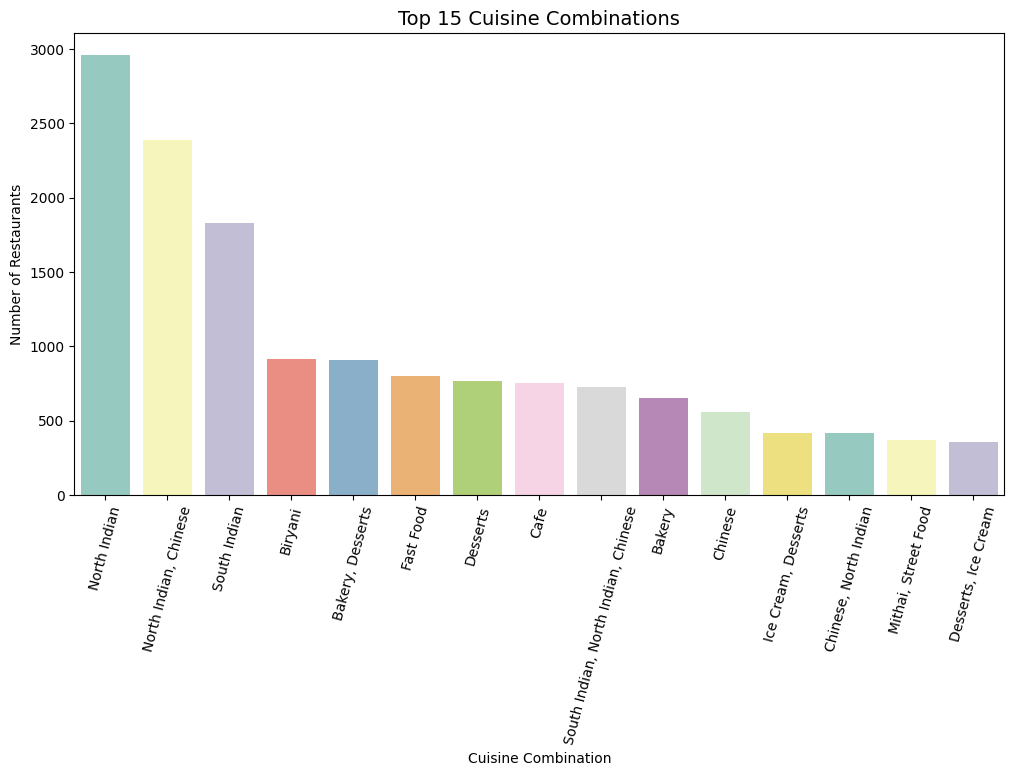

In [28]:
# Find most frequent cuisine combinations
cuisine_combos = df['cuisines'].value_counts().head(15).reset_index()
cuisine_combos.columns = ['cuisine_combo', 'count']

plt.figure(figsize=(12,6))
sns.barplot(
    data=cuisine_combos,
    x='cuisine_combo',
    y='count',
    hue='cuisine_combo',
    palette='Set3',
    legend=False
)

plt.title("Top 15 Cuisine Combinations", fontsize=14)
plt.xlabel("Cuisine Combination")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=75)
plt.show()


In [29]:
# Average rating comparison based on service availability
service_impact = df.groupby(['online_order','book_table'])['rate'].mean().reset_index()
print("Average Ratings by Service Availability:\n")
print(service_impact)


Average Ratings by Service Availability:

   online_order  book_table      rate
0             0           0  3.605105
1             0           1  4.144781
2             1           0  3.662119
3             1           1  4.125650


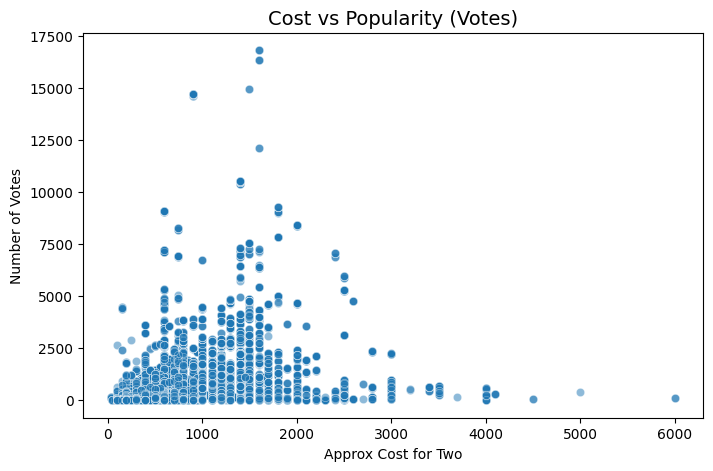

In [30]:
# Scatter plot cost vs votes
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='cost', y='votes', alpha=0.5)

plt.title("Cost vs Popularity (Votes)", fontsize=14)
plt.xlabel("Approx Cost for Two")
plt.ylabel("Number of Votes")
plt.show()


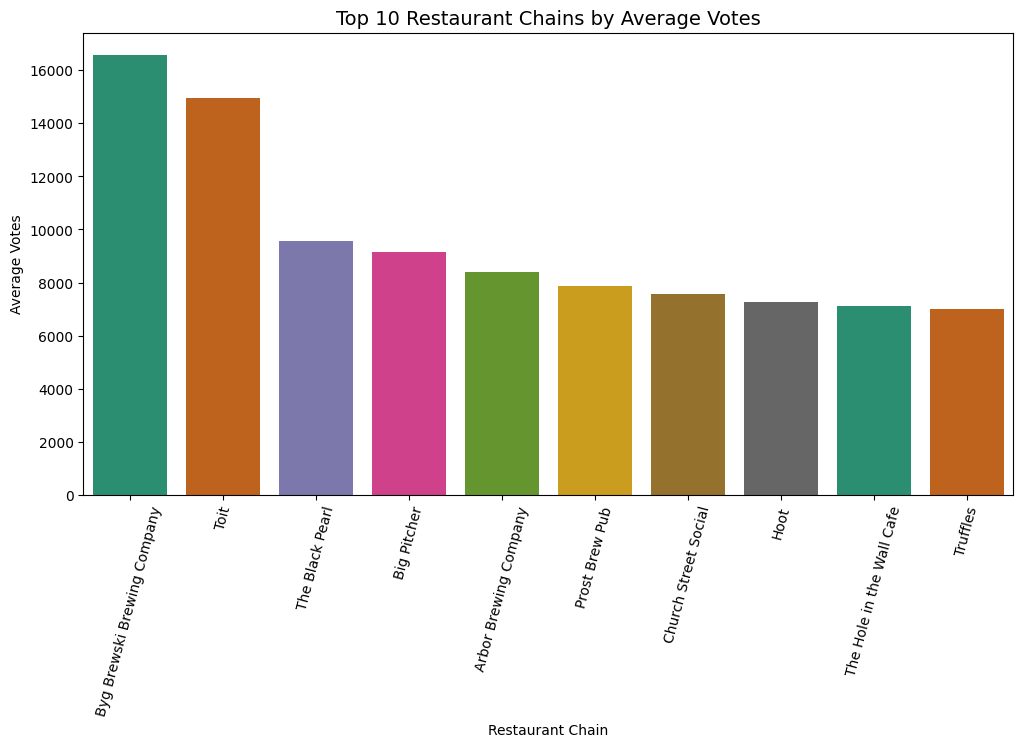

In [31]:
# Average votes per restaurant chain
chain_votes = df.groupby('name')['votes'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=chain_votes,
    x='name',
    y='votes',
    hue='name',
    palette='Dark2',
    legend=False
)

plt.title("Top 10 Restaurant Chains by Average Votes", fontsize=14)
plt.xlabel("Restaurant Chain")
plt.ylabel("Average Votes")
plt.xticks(rotation=75)
plt.show()


## Step 6: Geographic Insights

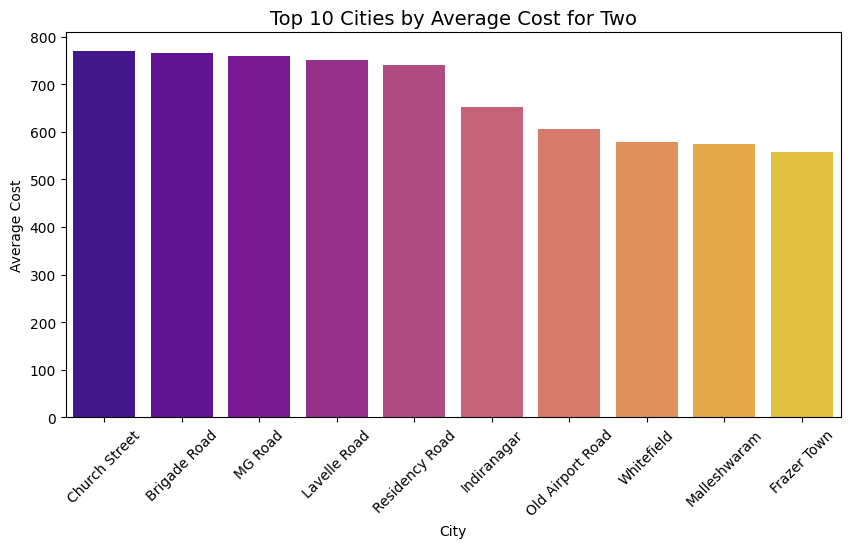

In [32]:
# Average cost for two people across cities
city_cost = df.groupby('city')['cost'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    data=city_cost,
    x='city',
    y='cost',
    hue='city',
    palette='plasma',
    legend=False
)

plt.title("Top 10 Cities by Average Cost for Two", fontsize=14)
plt.xlabel("City")
plt.ylabel("Average Cost")
plt.xticks(rotation=45)
plt.show()


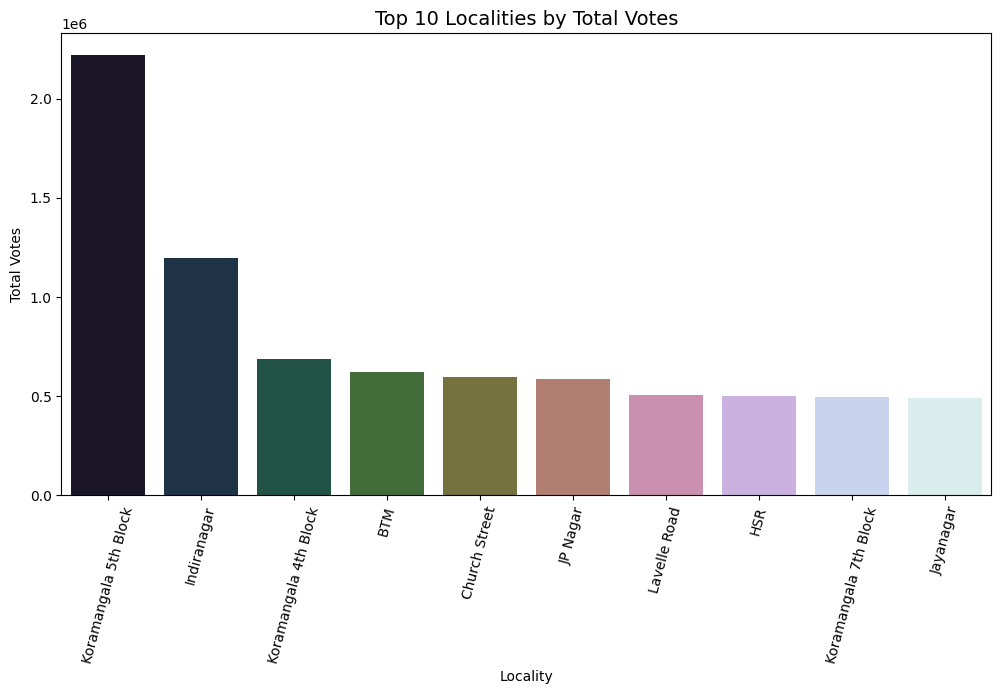

In [33]:
# Localities with highest votes (popularity measure)
loc_votes = df.groupby('location')['votes'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=loc_votes,
    x='location',
    y='votes',
    hue='location',
    palette='cubehelix',
    legend=False
)

plt.title("Top 10 Localities by Total Votes", fontsize=14)
plt.xlabel("Locality")
plt.ylabel("Total Votes")
plt.xticks(rotation=75)
plt.show()


In [34]:
# Top cuisine per location (example with 10 locations)
popular_cuisine_loc = df.groupby('location')['cuisines'].agg(lambda x: x.mode()[0]).reset_index()

print("Most Popular Cuisine by Location (sample):\n")
print(popular_cuisine_loc.head(10))


Most Popular Cuisine by Location (sample):

             location               cuisines
0                 BTM  North Indian, Chinese
1        Banashankari           South Indian
2           Banaswadi           South Indian
3   Bannerghatta Road  North Indian, Chinese
4        Basavanagudi           South Indian
5  Basaveshwara Nagar                Biryani
6           Bellandur           North Indian
7        Bommanahalli  North Indian, Chinese
8        Brigade Road           North Indian
9         Brookefield  North Indian, Chinese


In [35]:
import folium

# Create a base map (centered on Bengaluru)
m = folium.Map(location=[12.9716, 77.5946], zoom_start=11)

# Add markers for first 500 restaurants (to avoid clutter)
for i, row in df.head(500).iterrows():
    folium.CircleMarker(
        location=[12.9716 + np.random.uniform(-0.05,0.05), 77.5946 + np.random.uniform(-0.05,0.05)],
        radius=3,
        popup=row['name'],
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

m


## Step 7: Machine Learning Extension

In [36]:
# Convert ratings into categories for classification
def rating_category(x):
    if x < 3.5:
        return 'Low'
    elif 3.5 <= x < 4.0:
        return 'Medium'
    else:
        return 'High'

df['rating_category'] = df['rate'].apply(rating_category)

print("Rating Category Distribution:\n")
print(df['rating_category'].value_counts())


Rating Category Distribution:

rating_category
Medium    27818
High      12399
Low       11500
Name: count, dtype: int64


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select features
X = df[['votes', 'cost', 'online_order', 'book_table', 'type', 'city', 'rest_type']].copy()
y = df['rating_category']

# Encode categorical columns safely
enc = LabelEncoder()
for col in ['type','city','rest_type']:
    X.loc[:, col] = enc.fit_transform(X[col].astype(str))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Saving the models
import pickle

# Save model
with open("rating_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("Model saved successfully as rating_model.pkl")
from sklearn.preprocessing import LabelEncoder

encoders = {}
print(df.columns.tolist())

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

# save
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)




# Results
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model saved successfully as rating_model.pkl


KeyError: 'url'

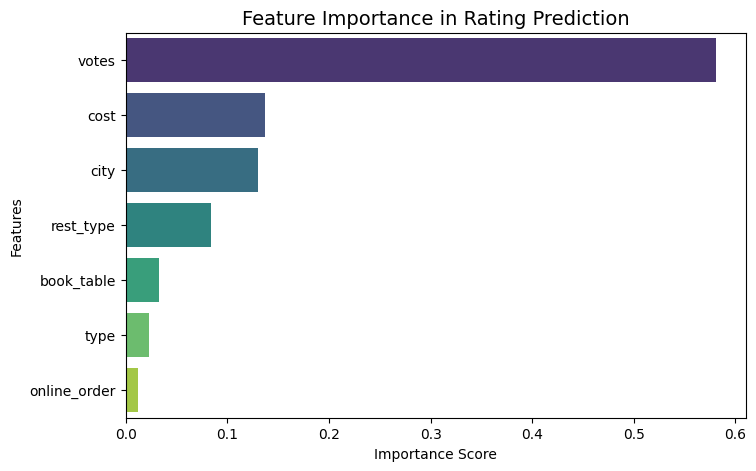

In [39]:
# Feature importance plot (fixed for seaborn v0.14+)
importances = rf.feature_importances_
features = X.columns

# Convert to DataFrame for seaborn
fi_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    data=fi_df,
    x='importance',
    y='feature',
    hue='feature',        # required for seaborn >= 0.14
    palette='viridis',
    legend=False
)

plt.title("Feature Importance in Rating Prediction", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


## Step 8: Key Insights, Conclusion & Future Scope

In [40]:
print("📌 Key Insights from Zomato Dataset Analysis\n")

print("1. Majority of restaurants are clustered in metropolitan areas like Koramangala, Indiranagar, etc.")
print("2. Online ordering is more popular than table booking across Bengaluru.")
print("3. North Indian and Chinese cuisines dominate customer demand.")
print("4. Most restaurants fall in the Medium cost range (₹300–700 for two).")
print("5. Restaurants with higher ratings generally attract more votes, showing credibility.")
print("6. Casual Dining is the most common restaurant type, followed by Quick Bites and Cafes.")
print("7. Service features like online delivery and table booking strongly influence ratings.")
print("8. Top chains include Domino’s, McDonald’s, Café Coffee Day, and others.")


📌 Key Insights from Zomato Dataset Analysis

1. Majority of restaurants are clustered in metropolitan areas like Koramangala, Indiranagar, etc.
2. Online ordering is more popular than table booking across Bengaluru.
3. North Indian and Chinese cuisines dominate customer demand.
4. Most restaurants fall in the Medium cost range (₹300–700 for two).
5. Restaurants with higher ratings generally attract more votes, showing credibility.
6. Casual Dining is the most common restaurant type, followed by Quick Bites and Cafes.
7. Service features like online delivery and table booking strongly influence ratings.
8. Top chains include Domino’s, McDonald’s, Café Coffee Day, and others.


In [41]:
print("📌 Business & Customer Insights\n")

print("👉 Customers:")
print("- Can find affordable, highly-rated restaurants (Value-for-Money options).")
print("- Can explore popular cuisine combinations (e.g., North Indian + Chinese).")

print("\n👉 Restaurant Owners:")
print("- Online delivery & table booking boost ratings and popularity.")
print("- Pricing strategies should target the ₹300–700 range to capture more customers.")
print("- Focus on dominant cuisines (North Indian, South Indian, Chinese).")


📌 Business & Customer Insights

👉 Customers:
- Can find affordable, highly-rated restaurants (Value-for-Money options).
- Can explore popular cuisine combinations (e.g., North Indian + Chinese).

👉 Restaurant Owners:
- Online delivery & table booking boost ratings and popularity.
- Pricing strategies should target the ₹300–700 range to capture more customers.
- Focus on dominant cuisines (North Indian, South Indian, Chinese).


In [42]:
print("📌 Conclusion\n")
print("This project demonstrates how a real-world dataset can be cleaned, explored, and analyzed to extract actionable insights.")
print("Customers benefit from identifying affordable, high-quality restaurants, while restaurant owners can refine services and pricing.")
print("The analysis also highlights market trends useful for expansion decisions and new restaurant openings.")


📌 Conclusion

This project demonstrates how a real-world dataset can be cleaned, explored, and analyzed to extract actionable insights.
Customers benefit from identifying affordable, high-quality restaurants, while restaurant owners can refine services and pricing.
The analysis also highlights market trends useful for expansion decisions and new restaurant openings.


In [43]:
print("📌 Future Scope\n")
print("1. Build a personalized restaurant recommendation system.")
print("2. Expand predictive modeling using advanced ML algorithms (XGBoost, Neural Nets).")
print("3. Integrate real-time Zomato API data for live analysis.")
print("4. Merge with external datasets (population, income, tourism) for deeper market feasibility studies.")


📌 Future Scope

1. Build a personalized restaurant recommendation system.
2. Expand predictive modeling using advanced ML algorithms (XGBoost, Neural Nets).
3. Integrate real-time Zomato API data for live analysis.
4. Merge with external datasets (population, income, tourism) for deeper market feasibility studies.
